In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap=True)
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor, ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


In [22]:
data =pd.read_csv('energy_pred.csv',error_bad_lines=False)
print(data.columns)
print(data.shape)
data.head()

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'BuildingAge',
       'SiteEnergyUseWNLog', 'TotalGHGEmissionsLog'],
      dtype='object')
(1693, 29)


,OSEBuildingID,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,ENERGYSTARScore,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge,SiteEnergyUseWNLog,TotalGHGEmissionsLog
0,1,NonResidential,Hotel,7,DOWNTOWN,47.61220,-122.33799,1.0,12,88434,...,60.0,7226362.5,7456910.0,2003882.00,3946027.0,1276453.0,249.98,89,6.872559,2.399639
1,2,NonResidential,Hotel,7,DOWNTOWN,47.61317,-122.33393,1.0,11,103566,...,61.0,8387933.0,8664479.0,0.00,3242851.0,5145082.0,295.86,20,6.937743,2.472552
2,3,NonResidential,Hotel,7,DOWNTOWN,47.61393,-122.33810,1.0,41,956110,...,43.0,72587024.0,73937112.0,21566554.00,49526664.0,1493800.0,2089.28,47,7.868862,3.320204
3,5,NonResidential,Hotel,7,DOWNTOWN,47.61412,-122.33664,1.0,10,61320,...,56.0,6794584.0,6946800.5,2214446.25,2768924.0,1811213.0,286.43,90,6.841785,2.458532
4,8,NonResidential,Hotel,7,DOWNTOWN,47.61375,-122.34047,1.0,18,175580,...,75.0,14172606.0,14656503.0,0.00,5368607.0,8803998.0,505.01,36,7.166030,2.704159


In [71]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep]

In [72]:
clean_dataset(data)

,OSEBuildingID,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge,SiteEnergyUseWNLog,TotalGHGEmissionsLog
36,50,SPS-District K-12,K-12 School,7,MAGNOLIA / QUEEN ANNE,47.656710,-122.390470,1.0,2,54986,0,54986,K-12 School,54986.0,Inused,0.0,Inused,0.0,2016,97.0,1650279.25,1.802471e+06,0.0,1217589.0,432690.0,31.47,26,6.255869,1.511482
43,57,NonResidential,Large Office,7,DOWNTOWN,47.611300,-122.336590,1.0,5,168115,0,168115,Office,103362.0,Retail Store,65676.0,Data Center,493.0,2016,78.0,9536161.00,9.536161e+06,0.0,9536160.0,0.0,66.48,43,6.979374,1.829175
52,68,NonResidential,Hotel,7,LAKE UNION,47.620010,-122.342740,1.0,7,150453,34735,115718,Hotel,107547.0,Restaurant,3000.0,Inused,0.0,2014,84.0,6715187.00,6.835264e+06,0.0,3396109.0,3319078.0,199.95,16,6.834755,2.303088
115,185,SPS-District K-12,K-12 School,5,NORTH,47.707630,-122.294530,1.0,2,236758,0,236758,K-12 School,238550.0,Parking,0.0,Inused,0.0,2016,96.0,8355988.50,9.287467e+06,0.0,4789948.0,3566039.0,222.78,5,6.967897,2.349821
136,225,SPS-District K-12,K-12 School,1,DELRIDGE,47.529150,-122.365110,1.0,2,367884,0,367884,K-12 School,367884.0,Inused,0.0,Inused,0.0,2016,97.0,12265516.00,1.327934e+07,0.0,8205020.0,4060496.0,272.85,6,7.123177,2.437513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,34908,NonResidential,Supermarket/Grocery Store,3,EAST,47.622560,-122.320920,1.0,2,66497,0,66497,Supermarket/Grocery Store,66497.0,Inused,0.0,Inused,0.0,2013,84.0,9290214.00,9.290214e+06,0.0,9133009.0,157203.0,72.02,66,6.968026,1.863442
1563,35392,NonResidential,Supermarket/Grocery Store,7,MAGNOLIA / QUEEN ANNE,47.624730,-122.347270,1.0,4,45980,0,45980,Supermarket/Grocery Store,45980.0,Inused,0.0,Inused,0.0,2013,79.0,8305255.00,8.573323e+06,0.0,5369235.0,2936020.0,193.36,10,6.933149,2.288607
1598,49776,NonResidential,Large Office,7,DOWNTOWN,47.611560,-122.344010,1.0,13,354086,149326,204760,Office,193393.0,Parking,149326.0,Multifamily Housing,38225.0,201620092008,88.0,13458948.00,1.407037e+07,0.0,12288296.0,1170651.0,147.84,28,7.148305,2.172720
1631,49985,NonResidential,Large Office,7,LAKE UNION,47.623840,-122.339410,1.0,6,427181,0,427181,Office,427181.0,Parking,169195.0,Inused,0.0,20172016,99.0,16371039.00,1.681085e+07,0.0,14213039.0,2157998.0,213.70,2,7.225590,2.331832


In [73]:
pd.set_option('display.max_columns', None)
data.describe()

,OSEBuildingID,CouncilDistrictCode,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge,SiteEnergyUseWNLog,TotalGHGEmissionsLog
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,9.700000e+01,97.000000,9.700000e+01,9.700000e+01,97.000000,97.000000,97.000000,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.000000,97.000000,97.000000,97.000000
mean,5681.247423,5.783505,47.617752,-122.337699,1.010309,14.907216,4.028167e+05,75355.989691,3.274607e+05,2.998275e+05,83623.194844,13041.256685,84.845361,1.763794e+07,1.769534e+07,6.227937e+05,1.625422e+07,7.663701e+05,202.088660,34.474227,6.980091,2.083242
std,11573.075443,1.926930,0.029292,0.015983,0.101535,15.703690,4.044630e+05,105018.738906,3.389540e+05,3.077497e+05,95024.237719,40025.212514,14.358752,1.711286e+07,1.745246e+07,2.722600e+06,1.634377e+07,1.289781e+06,257.603302,26.211119,0.847744,0.452456
min,50.000000,1.000000,47.522220,-122.403200,1.000000,1.000000,2.118300e+04,0.000000,2.118300e+04,1.394500e+04,0.000000,0.000000,3.000000,3.615421e+05,0.000000e+00,0.000000e+00,1.569200e+05,0.000000e+00,2.520000,2.000000,0.000000,0.546543
25%,367.000000,4.000000,47.606150,-122.342740,1.000000,5.000000,1.500000e+05,0.000000,1.064650e+05,1.033620e+05,3291.899902,0.000000,81.000000,6.455828e+06,6.612733e+06,0.000000e+00,5.303806e+06,0.000000e+00,67.510000,16.000000,6.820381,1.835754
50%,524.000000,7.000000,47.613990,-122.335440,1.000000,8.000000,2.681300e+05,23775.000000,1.931980e+05,1.825400e+05,65676.000000,0.000000,88.000000,1.327069e+07,1.327934e+07,0.000000e+00,1.006244e+07,1.572030e+05,116.950000,27.000000,7.123177,2.071698
75%,780.000000,7.000000,47.623330,-122.330880,1.000000,20.000000,4.462610e+05,116280.000000,3.843020e+05,3.676230e+05,127192.000000,7666.000000,94.000000,2.422489e+07,2.129009e+07,0.000000e+00,2.115667e+07,8.878280e+05,224.360000,47.000000,7.328178,2.352877
max,49985.000000,7.000000,47.707630,-122.283390,2.000000,76.000000,1.952220e+06,512608.000000,1.632820e+06,1.680937e+06,389860.000000,303910.000000,99.000000,9.293764e+07,9.253726e+07,2.147409e+07,8.785186e+07,6.784415e+06,1891.470000,112.000000,7.966317,3.277029


Certaines colonnes ne sont pas numérique, il va falloir les modifier. Analysons plus en détail leur contenu:

In [74]:
objectColumns = list(data.dtypes[data.dtypes == np.object].index)
numericColumns = list(data.dtypes[data.dtypes != np.object].index)
print(objectColumns)
print(numericColumns)

['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'YearsENERGYSTARCertified']
['OSEBuildingID', 'CouncilDistrictCode', 'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'BuildingAge', 'SiteEnergyUseWNLog', 'TotalGHGEmissionsLog']


In [75]:
for column in objectColumns:
    print('{}: {} uniques values'.format(column,len(data[column].unique())))

BuildingType: 3 uniques values
PrimaryPropertyType: 11 uniques values
Neighborhood: 10 uniques values
LargestPropertyUseType: 9 uniques values
SecondLargestPropertyUseType: 15 uniques values
ThirdLargestPropertyUseType: 18 uniques values
YearsENERGYSTARCertified: 64 uniques values


N'ayant pas fait d'analyse poussée sur les outliers je vais utiliser le **RobustScaler** (les statistiques de centrage et de mise à l'échelle de RobustScaler sont basées sur des centiles et ne sont donc pas influencées par un petit nombre de valeurs aberrantes marginales très importantes) pour les valeurs numériques et le **OneHotEncoderpour** les catégories : 

In [76]:
y_columns = ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']
X = data.drop(y_columns, axis=1)

print(X.shape)
y = data[y_columns]
print(y.shape)
print(len(numericColumns))
for i in y_columns:
    numericColumns.remove(i)
print(len(numericColumns))


(97, 27)
(97, 2)
22
20


# Encodage et standardisation : 

In [77]:
# standardiser les données
preprocessor = make_column_transformer((RobustScaler(),numericColumns),(OneHotEncoder(handle_unknown = 'ignore'),objectColumns))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modèle Baseline : Régression linéaire multivariée :

In [78]:
print(X.columns)
print(y.columns)

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'BuildingAge', 'SiteEnergyUseWNLog', 'TotalGHGEmissionsLog'],
      dtype='object')
Index(['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'], dtype='object')


In [79]:
# ref : https://towardsdatascience.com/what-are-rmse-and-mae-e405ce230383
model = make_pipeline(preprocessor,LinearRegression())
model.fit(X_train,y_train)
print("score d'entrainement = ",model.score(X_train,y_train))
y_pred = model.predict(X_test)
print("score de la prédiction:")#, accuracy_score(y_test, y_pred)), 
print("MAE = ",mean_absolute_error(y_test,y_pred))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("median abs err = ",median_absolute_error(y_test,y_pred))

score d'entrainement =  0.9992169792690839
score de la prédiction:
MAE =  321163.6205492321
RMSE =  615589.4042091495
median abs err =  219271.00595868228


Le score de prédiction est assez correct, peut-il être meilleur en utilisant un modèle par variable à prédire:

In [80]:
for column in y_columns:
    X_train, X_test, y_train, y_test = train_test_split(X, y[column], test_size=0.2)
    model = make_pipeline(preprocessor,LinearRegression())
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('Méthode: LinearRegression OneHotEncoder RobustScaler')
    print('+ utilisation de pipelines')
    print('Prédiction de ',column)
    print('score d\'entrainement = ',model.score(X_train,y_train))
    print("score de la prédiction: ",  model.score(X_test, y_test)), 
    print("MAE = ",mean_absolute_error(y_test,y_pred))
    print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("median abs err = ",median_absolute_error(y_test,y_pred))
    print('')
 

Méthode: LinearRegression OneHotEncoder RobustScaler
+ utilisation de pipelines
Prédiction de  TotalGHGEmissions
score d'entrainement =  0.9996775131822893
score de la prédiction:  0.9299555613960359
MAE =  11.27249752988094
RMSE =  24.56951650615641
median abs err =  5.618610934457891

Méthode: LinearRegression OneHotEncoder RobustScaler
+ utilisation de pipelines
Prédiction de  SiteEnergyUse(kBtu)
score d'entrainement =  0.9966901871569831
score de la prédiction:  0.9789573290799103
MAE =  1790139.9346516915
RMSE =  2296855.810235927
median abs err =  1648948.1644246099



On a fait certaines approximations avec ce modèle: certraines catégories (celles du jeu de test) n'ont malheureusement pas été encodées. Cela générait des erreurs qu'on a décidé d'ignorer avec le paramètre handle_unknown = 'ignore' du OneHotEncoder. Il faudrait donc pour une telle méthode se passer de l'utilisation des pîpeline ou il faudrait appliquer la modification avant au rique de créer une fuite des données?

In [34]:
print(X.columns)
print(y.columns)

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'BuildingAge', 'SiteEnergyUseWNLog', 'TotalGHGEmissionsLog'],
      dtype='object')
Index(['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'], dtype='object')


In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
X = data.drop(y_columns, axis=1)
y = data[y_columns]

# essais peu concluant avec les transformation appliquées avant.
encoder=LabelEncoder()
for column in objectColumns:
    X[column] = encoder.fit_transform(X[column])
    
encoder=StandardScaler()
X_std = encoder.fit_transform(X)

for column in y_columns:
    X_train, X_test, y_train, y_test = train_test_split(X_std, y[column], test_size=0.2)
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('Méthode: LinearRegression LabelEncoder StandardScaler')
    print('Prédiction de ',column)
    print('score d\'entrainement = ',model.score(X_train,y_train))
    print("score de la prédiction:"), 
    print("MAE = ",mean_absolute_error(y_test,y_pred))
    print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("median abs err = ",median_absolute_error(y_test,y_pred))
    print('')

Méthode: LinearRegression LabelEncoder StandardScaler
Prédiction de  TotalGHGEmissions
score d'entrainement =  0.454707777261368
score de la prédiction:
MAE =  122.31852683383491
RMSE =  182.92812833352647
median abs err =  99.13321969172694

Méthode: LinearRegression LabelEncoder StandardScaler
Prédiction de  SiteEnergyUse(kBtu)
score d'entrainement =  0.9159281946317275
score de la prédiction:
MAE =  5547807.29010694
RMSE =  7691287.127335575
median abs err =  3684910.5799016133



In [35]:

# essais peu concluant avec les transformation appliquées avant.
encoder= LabelBinarizer()
for column in objectColumns:
    X[column] = encoder.fit_transform(X[column])
    
encoder=StandardScaler()
X_std = encoder.fit_transform(X)

for column in y_columns:
    X_train, X_test, y_train, y_test = train_test_split(X_std, y[column], test_size=0.2)
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('Méthode: LinearRegression LabelBinarizer StandardScaler')
    print('Prédiction de ',column)
    print('score d\'entrainement = ',model.score(X_train,y_train))
    print("score de la prédiction:"), 
    print("MAE = ",mean_absolute_error(y_test,y_pred))
    print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("median abs err = ",median_absolute_error(y_test,y_pred))
    print('')

Méthode: LinearRegression LabelBinarizer StandardScaler
Prédiction de  TotalGHGEmissions
score d'entrainement =  0.9999999999018951
score de la prédiction:
MAE =  0.0028069959601374705
RMSE =  0.0032636885853023143
median abs err =  0.002503158988609755

Méthode: LinearRegression LabelBinarizer StandardScaler
Prédiction de  SiteEnergyUse(kBtu)
score d'entrainement =  0.9999908300982003
score de la prédiction:
MAE =  71399.88025381416
RMSE =  177288.4450288062
median abs err =  17617.84241459053



**Conclusion:**

Le choix des transformers utilisés pour standardiser nos données est très impactant sur nos résultat. Un LabelEncoder ou un LabelBinarizer associés avec des StandardScaler donne des résultats très médiocres. Un pipeline utilisant RobustScaler et OneHotEncoder donne des résultats bien meilleur et totalement admissible mais obligent par contre à ignorer certaines lignes dont les catégories se retrouvent dans le jeu d'entrainement mais pas dans le jeu de test et ne sont par conséquent pas connues du modèle. On essaiera de gommer ces imperfections dans la suite avec une validation croisée.



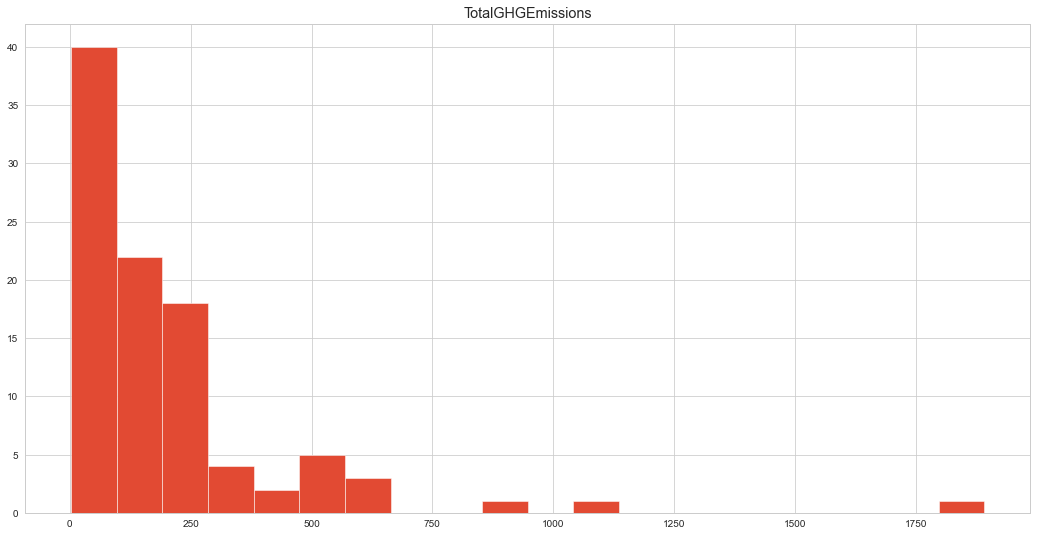

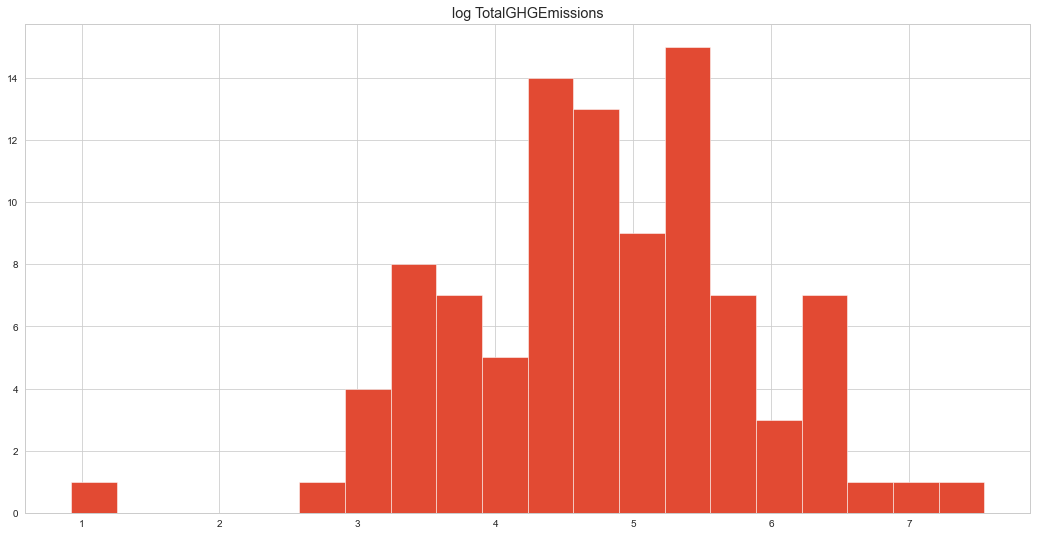

In [36]:
n_bins = 20
fig = plt.figure(figsize=(18,9))
plt.hist(data['TotalGHGEmissions'],n_bins)
plt.title('TotalGHGEmissions')
plt.show()
fig = plt.figure(figsize=(18,9))
plt.hist(np.log(data['TotalGHGEmissions']),n_bins)
plt.title('log TotalGHGEmissions')
plt.show()

On pourrait justifier un passage au log pour améliorer la précision des algorithme mais le RobustScaler nous permet de nous affranchir de cette transormation car il prend déjà en charge les changements d'échelles et nivelle les différences importantes et dans la pratique nous a donné de meilleurs résultats.

**Comparaison des modèles :**

In [57]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [37]:
from xgboost.sklearn import XGBRegressor
results = []
algos = {
    'LinearRegression' : LinearRegression(),
    'Ridge' : Ridge(),
    'Lasso' : Lasso(tol=0.5),
    'ElasticNet' : ElasticNet(),
    'SGDRegressor': SGDRegressor(),
    'SVR': SVR(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'XGBRegressor' : XGBRegressor()
}
X_train, X_test, y_train_all, y_test_all = train_test_split(X, y, test_size=0.2, random_state=1)

In [38]:
for algo_name, algo in algos.items():
    print('Algorithme: ',algo_name)
    for column in y_columns:
        y_test = y_test_all[column]
        y_train = y_train_all[column]
        model = make_pipeline(preprocessor,algo)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print('Prédiction de ',column)
        print('score d\'entrainement = ',model.score(X_train,y_train))
        print("score de la prédiction: ",  model.score(X_test, y_test))
        mae = mean_absolute_error(y_test,y_pred)
        rmse = np.sqrt(mean_squared_error(y_test,y_pred))
        med_abs_err = median_absolute_error(y_test,y_pred)
        print("MAE = ", mae)        
        print("RMSE = ",rmse)
        print("median abs err = ", med_abs_err)
        print('')
        results.append([algo_name, column, model.score(X_test, y_test), mae, rmse, med_abs_err])
    print('-'*100)

Algorithme:  LinearRegression
Prédiction de  TotalGHGEmissions
score d'entrainement =  0.9999999999079783
score de la prédiction:  0.9999999997066199
MAE =  0.003487436889914086
RMSE =  0.0046791671392040724
median abs err =  0.0026923212113558748

Prédiction de  SiteEnergyUse(kBtu)
score d'entrainement =  0.999989165941441
score de la prédiction:  0.9998385854073957
MAE =  77829.89589759978
RMSE =  250783.93196522043
median abs err =  17785.898590330966

----------------------------------------------------------------------------------------------------
Algorithme:  Ridge
Prédiction de  TotalGHGEmissions
score d'entrainement =  0.9999163206718519
score de la prédiction:  0.9872778260076093
MAE =  10.47133389281798
RMSE =  30.812995916553852
median abs err =  2.5846896541934115

Prédiction de  SiteEnergyUse(kBtu)
score d'entrainement =  0.9996086457912438
score de la prédiction:  0.9445882462972371
MAE =  1517322.9676195304
RMSE =  4646535.480080338
median abs err =  354049.1739481846


# Comparaison des modèles sans le EnergyStarScore : 

In [39]:
X_train = X_train.drop(['ENERGYSTARScore'], axis=1)
X_test = X_test.drop(['ENERGYSTARScore'], axis=1)
results_without_energyStarScore = []
numericColumns.remove('ENERGYSTARScore')
print(numericColumns)
preprocessor = make_column_transformer((RobustScaler(),numericColumns),(OneHotEncoder(handle_unknown = 'ignore'),objectColumns))

['OSEBuildingID', 'CouncilDistrictCode', 'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'BuildingAge', 'SiteEnergyUseWNLog', 'TotalGHGEmissionsLog']


In [40]:
for algo_name, algo in algos.items():
    print('Algorithme: ',algo_name)
    for column in y_columns:
        y_test = y_test_all[column]
        y_train = y_train_all[column]
        model = make_pipeline(preprocessor,algo)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print('Prédiction de ',column)
        print('score d\'entrainement = ',model.score(X_train,y_train))
        print("score de la prédiction: ",  model.score(X_test, y_test))
        mae = mean_absolute_error(y_test,y_pred)
        rmse = np.sqrt(mean_squared_error(y_test,y_pred))
        med_abs_err = median_absolute_error(y_test,y_pred)
        print("MAE = ", mae)        
        print("RMSE = ",rmse)
        print("median abs err = ", med_abs_err)
        print('')
        results_without_energyStarScore.append([algo_name, column, model.score(X_test, y_test), mae, rmse, med_abs_err])
    print('-'*100)

Algorithme:  LinearRegression
Prédiction de  TotalGHGEmissions
score d'entrainement =  0.9999999999079429
score de la prédiction:  0.9999999996979592
MAE =  0.00350108314448061
RMSE =  0.004747731214599872
median abs err =  0.0027310274328442574

Prédiction de  SiteEnergyUse(kBtu)
score d'entrainement =  0.9999886245308806
score de la prédiction:  0.9998804200355772
MAE =  70087.11463380777
RMSE =  215852.71721039078
median abs err =  17484.530936568044

----------------------------------------------------------------------------------------------------
Algorithme:  Ridge
Prédiction de  TotalGHGEmissions
score d'entrainement =  0.9999273584677697
score de la prédiction:  0.9855593260017862
MAE =  10.643446047624373
RMSE =  32.82819412261367
median abs err =  2.1840216132637718

Prédiction de  SiteEnergyUse(kBtu)
score d'entrainement =  0.9996666125359106
score de la prédiction:  0.9367143462003118
MAE =  1543549.1277460076
RMSE =  4965705.34324338
median abs err =  310079.2823202526

-

# Conclusion

In [41]:
df_results = pd.DataFrame(results,columns=['algorithm', 'column','predict score', 'MAE', 'RMSE', 'median abs err'])
display(df_results.sort_values(by=['column','predict score'],ascending=False))
print("Sans le EnergyStarScore:")
df_results_without_energyStarScore = pd.DataFrame(results_without_energyStarScore,columns=['algorithm', 'column','predict score', 'MAE', 'RMSE', 'median abs err'])
display(df_results_without_energyStarScore.sort_values(by=['column','predict score'],ascending=False))

,algorithm,column,predict score,MAE,RMSE,median abs err
0,LinearRegression,TotalGHGEmissions,1.000000e+00,3.487437e-03,4.679167e-03,2.692321e-03
2,Ridge,TotalGHGEmissions,9.872778e-01,1.047133e+01,3.081300e+01,2.584690e+00
6,ElasticNet,TotalGHGEmissions,9.576372e-01,3.006925e+01,5.622710e+01,1.805077e+01
4,Lasso,TotalGHGEmissions,9.260114e-01,5.328772e+01,7.430804e+01,3.850390e+01
12,RandomForestRegressor,TotalGHGEmissions,8.411963e-01,3.750797e+01,1.088638e+02,2.255750e+00
14,XGBRegressor,TotalGHGEmissions,8.121917e-01,4.251637e+01,1.183888e+02,3.607989e+00
10,SVR,TotalGHGEmissions,-1.333695e-01,1.546116e+02,2.908299e+02,8.162000e+01
8,SGDRegressor,TotalGHGEmissions,-5.988456e+40,1.494843e+22,6.685143e+22,1.622754e+11
1,LinearRegression,SiteEnergyUse(kBtu),9.998386e-01,7.782990e+04,2.507839e+05,1.778590e+04
3,Ridge,SiteEnergyUse(kBtu),9.445882e-01,1.517323e+06,4.646535e+06,3.540492e+05


Sans le EnergyStarScore:


,algorithm,column,predict score,MAE,RMSE,median abs err
0,LinearRegression,TotalGHGEmissions,1.000000e+00,3.501083e-03,4.747731e-03,2.731027e-03
2,Ridge,TotalGHGEmissions,9.855593e-01,1.064345e+01,3.282819e+01,2.184022e+00
4,Lasso,TotalGHGEmissions,9.714951e-01,3.794921e+01,4.612249e+01,2.890030e+01
6,ElasticNet,TotalGHGEmissions,9.509841e-01,3.127238e+01,6.048142e+01,1.472313e+01
12,RandomForestRegressor,TotalGHGEmissions,8.368685e-01,3.837737e+01,1.103373e+02,2.329350e+00
14,XGBRegressor,TotalGHGEmissions,8.119277e-01,4.276035e+01,1.184720e+02,4.236551e+00
10,SVR,TotalGHGEmissions,-1.333694e-01,1.546115e+02,2.908299e+02,8.162000e+01
8,SGDRegressor,TotalGHGEmissions,-2.088415e+37,2.791558e+20,1.248423e+21,1.442336e+11
1,LinearRegression,SiteEnergyUse(kBtu),9.998804e-01,7.008711e+04,2.158527e+05,1.748453e+04
3,Ridge,SiteEnergyUse(kBtu),9.367143e-01,1.543549e+06,4.965705e+06,3.100793e+05


- Le **XGBRegresson** et le **RandomForestRegressor** sont nos deux algorithmes les plus performants. 
- Ils obtiennent des résultats très satisfaisants. 
- Cependant une optimisation des paramètres des différents algorithmes pourrait créer des différences. 
- On va donc chercher à optimiser les paramètres de ces différents algorithme par le biais d'une validation croisée.
- Nous supprimerons néanmoins le SGDRegressor qui est totalement contre-performant et le SVR qui a des résultats pas assez bon.

# 7. Influence du score ENERGY STAR : 

* Le score ENERGY STAR fournit un aperçu complet de la performance énergétique d'un bâtiment, en tenant compte des actifs physiques, des opérations et du comportement des occupants du bâtiment. Il est exprimé sur une échelle de 1 à 100 facile à comprendre : plus le score est élevé, meilleure est la performance énergétique du bâtiment.

* Ce score permet de réaliser plusieurs actions :

   - Évaluer les données énergétiques réelles facturées,
   - Normaliser pour l'activité commerciale (heures, travailleurs, climat),
   - Comparer les bâtiments à la population nationale,
   - Indiquer le niveau de performance énergétique.

* Nous allons donc évaluer si ce score à un impact significatif sur les performances de notre modélisation.